In [65]:
import os,json,tqdm,pickle
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import log2

In [2]:
os.chdir('./../airbnb-data')

word-clouds for rooms by TF-IDF(document: each room)

In [4]:
with open('review_NJVR_with_NNP_0113.json','r') as fp:
    review = json.load(fp)

In [13]:
all_words_with_NNP = []
for k,rev_lst in review.items():
    for rev in rev_lst:
        for sent in rev[1]:
            all_words_with_NNP += sent

In [22]:
voca_freq_dic = {}
for k,v in Counter(all_words_with_NNP).items():
    voca_freq_dic[k] = v

In [23]:
len(voca_freq_dic)

53471

In [24]:
voca_freq_dic_clouds = {} # 전체 freq 20개 이상인 단어만 취급
for k,v in voca_freq_dic.items():
    if v>19:
        voca_freq_dic_clouds[k] = v

In [25]:
len(voca_freq_dic_clouds)

5597

In [28]:
sorted(voca_freq_dic_clouds.items(),key = lambda kv:kv[1],reverse=True)[:15]

[('be', 1032927),
 ('good', 176891),
 ("'s", 163987),
 ('very', 156644),
 ('clean', 133190),
 ('have', 128301),
 ('nice', 112386),
 ('so', 102401),
 ('room', 99058),
 ('go', 75256),
 ('time', 73736),
 ('house', 71437),
 ('stay', 71181),
 ('place', 68792),
 ('host', 64556)]

In [34]:
# room_word_freq = {}
# for k,rev_lst in review.items():
#     room_words = []
#     for rev in rev_lst:
#         for sent in rev[1]:
#             room_words += sent
#     room_word_freq[k] = Counter(room_words)

In [45]:
room_word_freq = {} # key를 'room_ID'로 갖는 word-freq 딕셔너리
maxCount = {} # max값 구해준다
for k,rev_lst in review.items():
        room_words = {}
        maxCount[k] = 0
        for rev in rev_lst:
            for sent in rev[1]:
                for w in sent:
                    if w in room_words:
                        room_words[w] += 1
                    else:
                        room_words[w] = 1
                        
                    if maxCount[k] < room_words[w]:
                        maxCount[k] = room_words[w]
            
        room_word_freq[k] = room_words

In [46]:
room_word_freq['10030136']

{"'s": 2,
 'accommodation': 5,
 'again': 2,
 'air': 1,
 'area': 1,
 'arrive': 1,
 'as': 1,
 'atmosphere': 1,
 'back': 1,
 'bathroom': 1,
 'be': 27,
 'beach': 3,
 'bed': 1,
 'bedroom': 1,
 'bienby': 1,
 'brighten': 1,
 'building': 1,
 'busan': 1,
 'catch': 1,
 'clean': 5,
 'cleanness': 1,
 'come': 1,
 'comfortable': 1,
 'consideration': 1,
 'construction': 1,
 'contact': 1,
 'convenience': 1,
 'cool': 1,
 'cover': 1,
 'dish': 1,
 'do': 1,
 'doubledecked': 1,
 'enough': 1,
 'especially': 1,
 'evening': 1,
 'everyone': 1,
 'exactly': 1,
 'excellent': 1,
 'facility': 1,
 'family': 4,
 'felt': 1,
 'first': 1,
 'fortunately': 1,
 'front': 2,
 'go': 3,
 'good': 4,
 'great': 3,
 'haeundae': 4,
 'harmonic': 1,
 'have': 2,
 'heating': 1,
 'home': 1,
 'host': 1,
 'interior': 1,
 'kitchen': 1,
 'last': 1,
 'like': 3,
 'living': 1,
 'locate': 1,
 'location': 1,
 'lodge': 1,
 'look': 1,
 'love': 2,
 'modern': 1,
 'more': 1,
 "n't": 2,
 'neat': 1,
 'new': 1,
 'next': 2,
 'nice': 5,
 'not': 1,
 'occup

In [40]:
invertedIdx = {}
for word in tqdm.tqdm(voca_freq_dic_clouds.keys()):
    invertedIdx[word] = []
    for room_id,v in room_word_freq.items():
        if word in v:
            invertedIdx[word].append(room_id)

100%|██████████████████████████████████████████████████████████████████████████████| 5597/5597 [00:56<00:00, 99.58it/s]


In [47]:
K = 0.5 # K + (1-K)*(f(t,d)/maxf(t,d)) 최솟값 0.5, 최댓값 1 
TF = {}
for k,v in room_word_freq.items():
    tfList = {}

    for w in v:
        if w not in voca_freq_dic_clouds:
            continue
        tfList[w] =  K + (1-K)*(v[w]/maxCount[k])
#         print('{0} | {1} + {2} *({3}/{4})  =  {5}'.format(
#             w, K, (1-K), v[w], maxCount[k], tfList[w]
#         ))
        
    TF[k] = tfList

In [50]:
docSize = len(room_word_freq)
TFIDF = {}
"""
TF = doc1|{단어1:0.54, 단어2:056 ...} 
"""
for k,v in TF.items():
    idfList = {}
    for t in v:
        idf = log2(docSize/len(invertedIdx[t]))
        idfList[t] = v[t] * idf
#         print('{0} | {1} * log({2} / {3}) = {4}'.format(
#             t, v[t], docSize, len(invertedIdx[t]), idfList[t]
#         ))
    
    TFIDF[k] = idfList

In [63]:
list(TFIDF.items())[1] # TF-IDF 결과, room을 하나의 doc으로 봤을때 단어의 가중치

('10076276',
 {"'m": 0.6734223315575113,
  "'s": 0.19755198830750992,
  "'ve": 0.8899095649786154,
  '17th': 5.1241257924024595,
  'accommodation': 0.45935897480098165,
  'addition': 2.524670135945692,
  'again': 0.43539403091435724,
  'air': 0.9664354473068102,
  'also': 0.5595723234195162,
  'apartment': 1.4741229553493205,
  'arrive': 1.218953057039814,
  'bathroom': 0.7305692330003285,
  'be': 0.055454323665743994,
  'building': 1.0587349459384714,
  'bus': 1.069696634626643,
  'busan': 1.9678511134076992,
  'call': 1.508232820871605,
  'care': 0.9557000839637507,
  'careful': 1.1986125758441586,
  'clean': 0.22768751666438816,
  'collect': 3.7678386446582612,
  'come': 0.5017076658386104,
  'comfortable': 0.4946942805549034,
  'communication': 1.6354703349939101,
  'concern': 2.5694561472545288,
  'conditioner': 1.2306835041727393,
  'consideration': 1.1638264765358064,
  'convenient': 0.4782712004252687,
  'environment': 1.613788238913226,
  'expect': 1.216794565295276,
  'famili

In [66]:
with open('TFIDF_room.dic','wb') as file: #TFIDF 결과를 저장
    pickle.dump(TFIDF, file)

In [67]:
room_id = '10076276'
threshold = 1

In [71]:
cloud_set = {}
for word,weight in  TFIDF[room_id].items():
    if weight > threshold:
        cloud_set[word] = weight

(-0.5, 399.5, 199.5, -0.5)

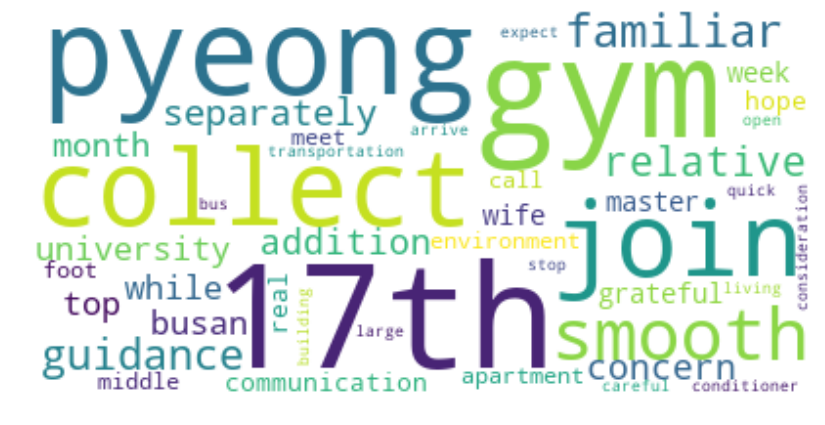

In [72]:
# court_mask=np.array(Image.open("court.jpg"))

cloud = WordCloud(font_path=None,background_color='white',mask=None,max_words=500).generate_from_frequencies(cloud_set)
plt.figure(figsize=(14,14))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')